# Model Building

<div class="span5 alert alert-info">
    Building Machine learning models to predict the customers who will repeat the purchase
</div>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

In [43]:
data = pd.read_csv("../../data/data.csv")
data.head()

,index,id,total_trans_purchaseamount_avg,12_mnths_total_purchase_amt,9_mnths_total_purchase_amt,6_mnths_total_purchase_amt,3_mnths_total_purchase_amt,1_month_total_purchase_amt,total_purchaseamount,total_purchasequantity,...,brand_purchased_amt_30days,brand_purchased_qty_30days,brand_purchased_amt_90days,brand_purchased_qty_90days,brand_purchased_amt_180days,brand_purchased_qty_180days,brand_purchased_amt_270days,brand_purchased_qty_270days,purchased_company_category_brand_count,purchased_company_category_count
0,0,13089312,5.279077,3610.73,2431.84,1566.45,892.43,376.00,3890.68,1469,...,7.98,2.0,19.95,5.0,19.95,5.0,19.95,5.0,0.0,0.0
1,1,13873775,7.352754,5644.72,4209.56,2998.90,1379.47,500.59,6088.08,2955,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
2,2,16138642,5.538669,1793.45,1630.18,1358.97,677.12,70.99,1872.07,734,...,0.00,0.0,3.99,1.0,8.98,2.0,8.98,2.0,0.0,0.0
3,3,16238376,4.262111,1513.81,1097.80,547.34,467.67,37.45,1836.97,722,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4,4,17486592,8.752492,7028.25,5413.99,4162.00,1802.40,752.90,8078.55,2014,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0


## Logistic Regression

In [44]:
def logisticRegression(df):
    df = df.sample(frac=1)
    X = df.drop(['repeater','repeattrips'],axis=1).values
    y = df['repeater'].values#.reshape(-1,1)
 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
    # Create the classifier: logreg
    logreg = LogisticRegression()    
    # Fit the classifier to the training data
    logreg.fit(X_train,y_train)    
    # Predict the labels of the test set: y_pred
    y_pred = logreg.predict(X_test)    
    # Compute and print the confusion matrix and classification report
    
    y_pred_prob = logreg.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

    # Compute cross-validated AUC scores: cv_auc
    cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')
    
    # Print list of AUC scores
    print("AUC scores computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

AUC: 0.526264359874
AUC scores computed using 5-fold cross-validation: 0.535848075041


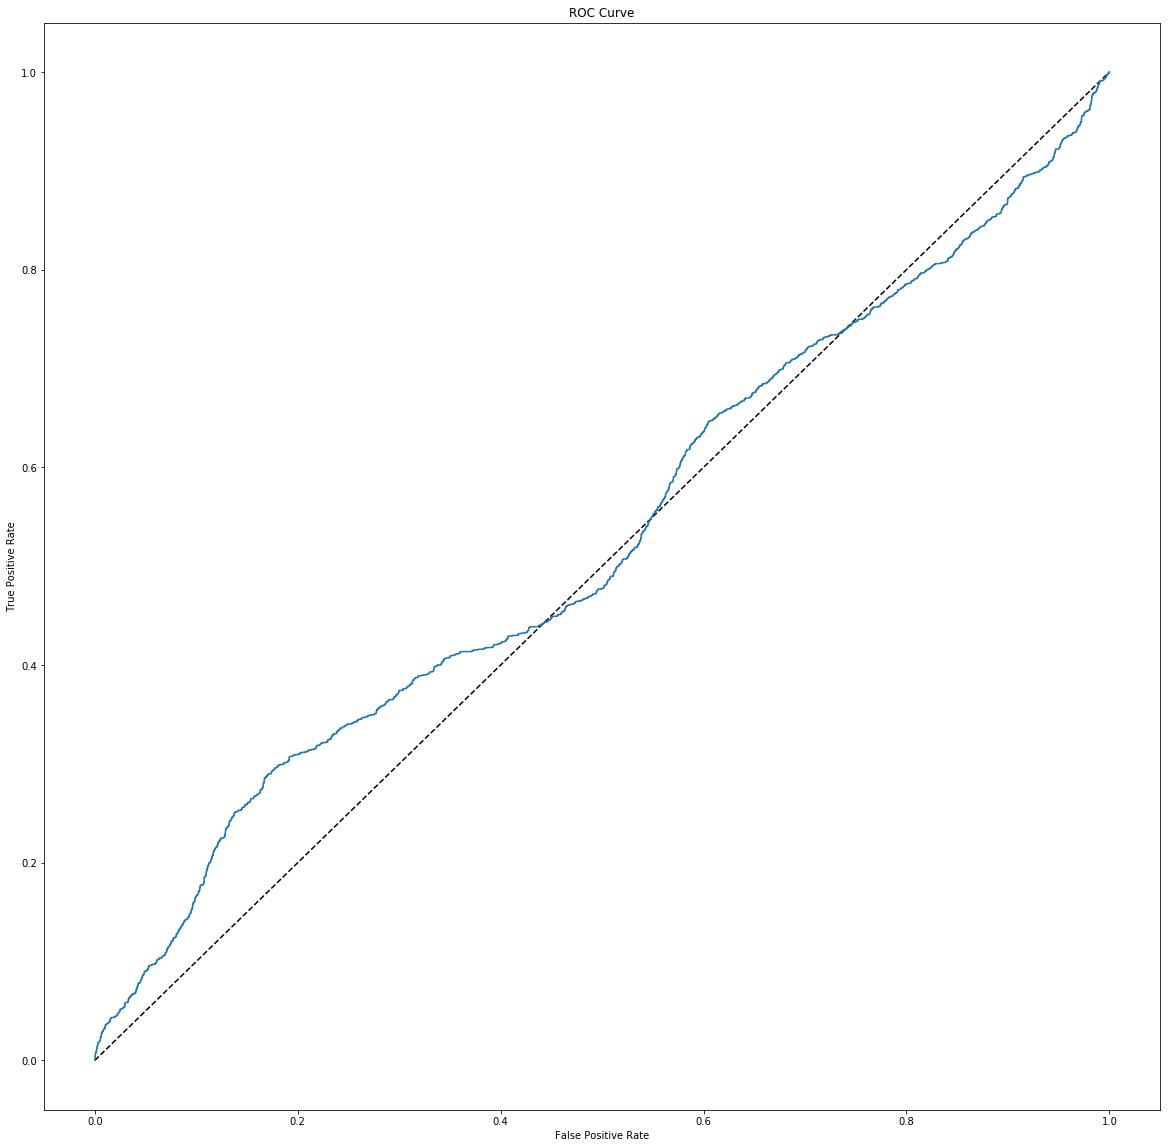

In [45]:
logisticRegression(data)

## Decision Tree

In [46]:
def decisionTreeClassifier(final_ds):

    final_ds = final_ds.sample(frac=1)
    X = final_ds.drop(['repeater','repeattrips'],axis=1).values
    y = final_ds['repeater'].values#.reshape(-1,1)
    
    
    clf = DecisionTreeClassifier(max_depth = 100, random_state = 42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
    
    #clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1)

    clf = clf.fit(X_train, y_train)    

    y_pred = clf.predict(X_test)
    
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
    
    # Compute cross-validated AUC scores: cv_auc
    cv_auc = cross_val_score(clf,X,y,cv=5,scoring='roc_auc')
    
    # Print list of AUC scores
    print(cv_auc)
    print("AUC scores computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

AUC: 0.552797654542
[0.56484183 0.55076973 0.5605439  0.56977036 0.56873392]
AUC scores computed using 5-fold cross-validation: 0.562931947586


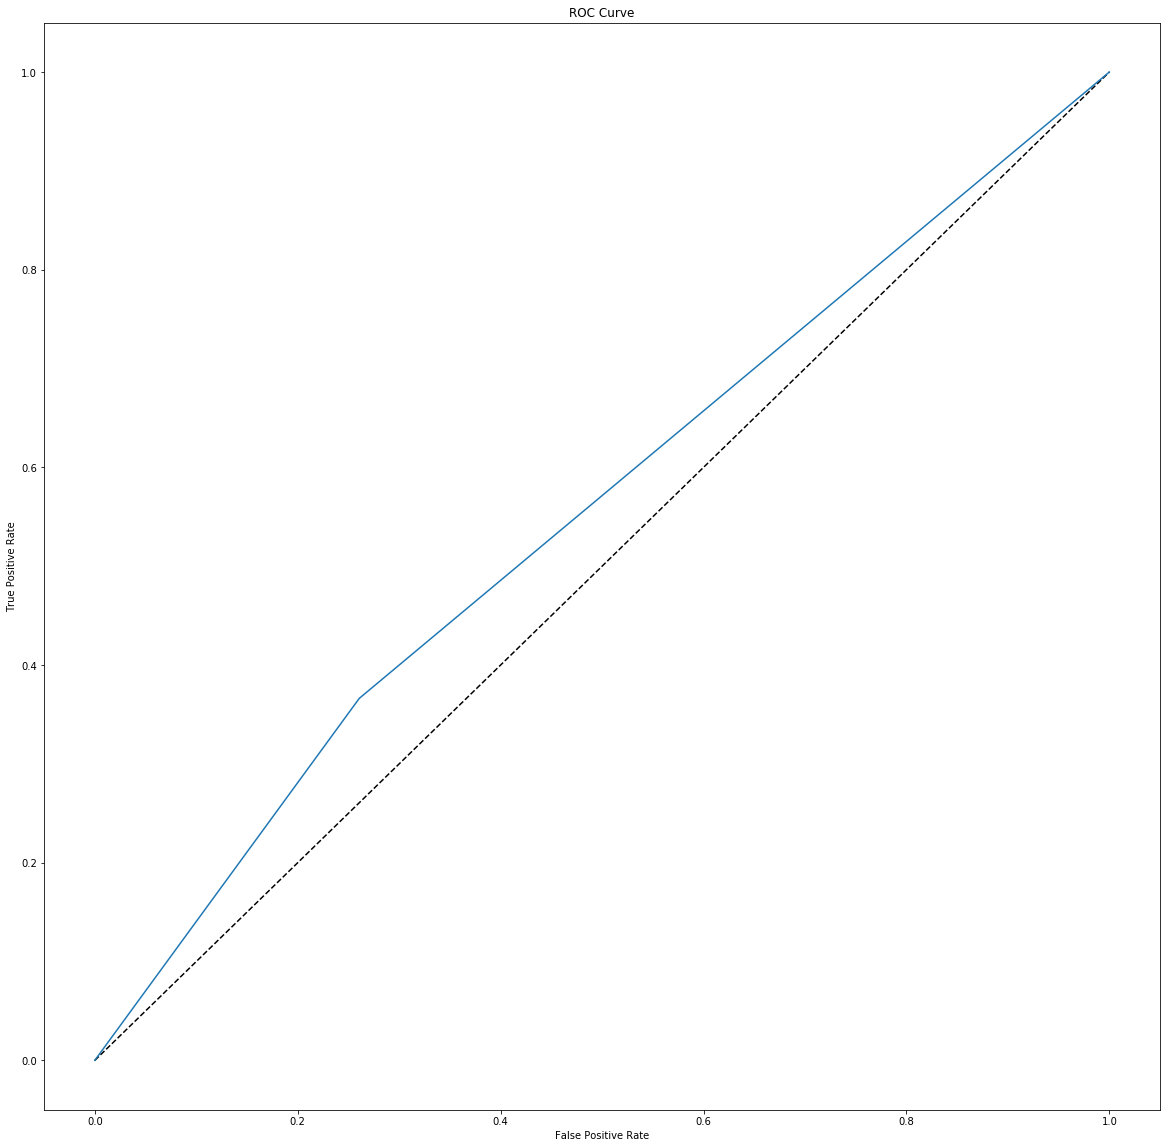

In [47]:
decisionTreeClassifier(data)

# Random Forest

In [55]:
def randomForestClassifier(final_ds):

    final_ds = final_ds.sample(frac=1)
    X = final_ds.drop(['index','id','repeater','repeattrips','quantity'],axis=1).values
    y = final_ds['repeater'].values#.reshape(-1,1)
    
    clf = RandomForestClassifier(n_estimators = 20, random_state = 42)

    #clf = RandomForestClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
    
    #clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1)

    clf = clf.fit(X_train, y_train)
        
    filename = '../../model/finalized_model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    
    y_pred = clf.predict(X_test)
    
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
    
    # Compute cross-validated AUC scores: cv_auc
    cv_auc = cross_val_score(clf,X,y,cv=5,scoring='roc_auc')
    
    # Print list of AUC scores
    print(cv_auc)
    print("AUC scores computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))
    
    print("\n*****************************************")
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Classification Matrix :")
    print(cm)
    print("\n\n")
    
    print("Classification Report :")
    target_names = ['non-repeater','repeater']
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("*****************************************")    
    
    feature_imp = clf.feature_importances_
     
    df_plt = final_ds.drop(['index','id','repeater','repeattrips','quantity'],axis=1).columns
    _ = plt.bar(range(len(df_plt)), feature_imp)
    _ = plt.xticks(range(len(df_plt)),df_plt,rotation=90)
    _ = plt.title('Coefficients Random Forest')
    _ = plt.ylabel('Coefficients')
    _ = plt.rcParams['figure.figsize'] = [20, 20]
    plt.savefig('../../plot/random_forest_feature_importance.png')
    plt.show()
    
    return clf

AUC: 0.652339817318
[0.64615226 0.68402824 0.65770189 0.66638718 0.66240723]
AUC scores computed using 5-fold cross-validation: 0.66333536126

*****************************************
Classification Matrix :
[[4275  402]
 [1317  406]]



Classification Report :
              precision    recall  f1-score   support

non-repeater       0.76      0.91      0.83      4677
    repeater       0.50      0.24      0.32      1723

 avg / total       0.69      0.73      0.69      6400

*****************************************


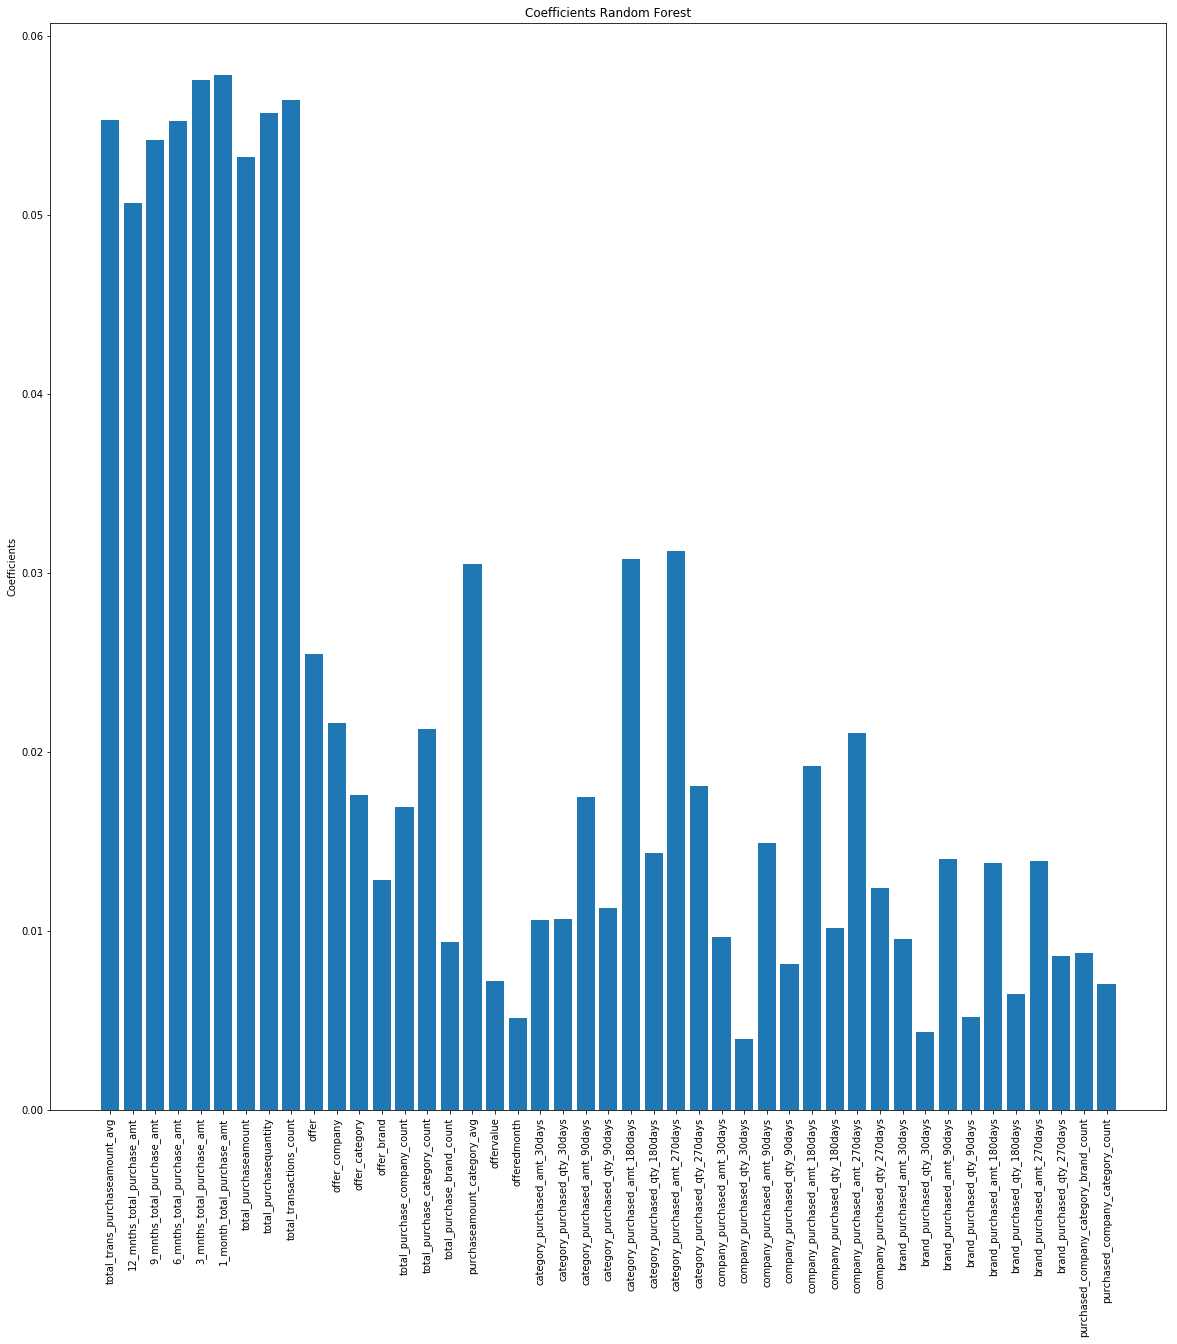

In [56]:
clf = randomForestClassifier(data)